In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('../data/PXR_ChEMBL_data.csv', sep=';')

In [3]:
data.head()

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type
0,CHEMBL2037345,NaN,NaN,296.33,0.0,3.03,SID17507927,COc1ccc(/C=N/Nc2nc3ccccc3[nH]2)cc1OC,EC50,'=',...,Homo sapiens,SINGLE PROTEIN,CHEMBL1201862,7,PubChem BioAssays,NaN,NaN,NaN,NaN,NaN
1,CHEMBL1576542,NaN,NaN,279.30,0.0,1.39,SID17409056,N#C/C(=C/c1ccccc1)c1nn(CCO)c(N)c1C#N,EC50,'=',...,Homo sapiens,SINGLE PROTEIN,CHEMBL1201862,7,PubChem BioAssays,NaN,NaN,NaN,NaN,NaN
2,CHEMBL1481360,NaN,NaN,310.35,0.0,3.64,SID7967615,CCCCc1cc2c(c(NC(C)=O)n1)c(=O)oc1ccccc12,EC50,'=',...,Homo sapiens,SINGLE PROTEIN,CHEMBL1201862,7,PubChem BioAssays,NaN,NaN,NaN,NaN,NaN
3,CHEMBL1567449,NaN,NaN,243.27,0.0,2.73,SID24804627,COc1ccccc1NC(=O)Nc1cccnc1,EC50,'>',...,Homo sapiens,SINGLE PROTEIN,CHEMBL1201862,7,PubChem BioAssays,NaN,NaN,NaN,NaN,NaN
4,CHEMBL1327628,NaN,NaN,282.13,0.0,4.03,SID24796875,O=C(Nc1cccnc1)Nc1cc(Cl)cc(Cl)c1,EC50,'>',...,Homo sapiens,SINGLE PROTEIN,CHEMBL1201862,7,PubChem BioAssays,NaN,NaN,NaN,NaN,NaN


In [4]:
data.columns

Index(['Molecule ChEMBL ID', 'Molecule Name', 'Molecule Max Phase',
       'Molecular Weight', '#RO5 Violations', 'AlogP', 'Compound Key',
       'Smiles', 'Standard Type', 'Standard Relation', 'Standard Value',
       'Standard Units', 'pChEMBL Value', 'Data Validity Comment', 'Comment',
       'Uo Units', 'Ligand Efficiency BEI', 'Ligand Efficiency LE',
       'Ligand Efficiency LLE', 'Ligand Efficiency SEI', 'Potential Duplicate',
       'Assay ChEMBL ID', 'Assay Description', 'Assay Type', 'BAO Format ID',
       'BAO Label', 'Assay Organism', 'Assay Tissue ChEMBL ID',
       'Assay Tissue Name', 'Assay Cell Type', 'Assay Subcellular Fraction',
       'Assay Parameters', 'Assay Variant Accession', 'Assay Variant Mutation',
       'Target ChEMBL ID', 'Target Name', 'Target Organism', 'Target Type',
       'Document ChEMBL ID', 'Source ID', 'Source Description',
       'Document Journal', 'Document Year', 'Cell ChEMBL ID', 'Properties',
       'Action Type'],
      dtype='object')

In [5]:
data['Standard Value'].head()

0     67346.0
1     82975.0
2     88714.0
3    116108.0
4    116099.0
Name: Standard Value, dtype: float64

In [6]:
data['Standard Units'].head()

0    nM
1    nM
2    nM
3    nM
4    nM
Name: Standard Units, dtype: object

<Axes: >

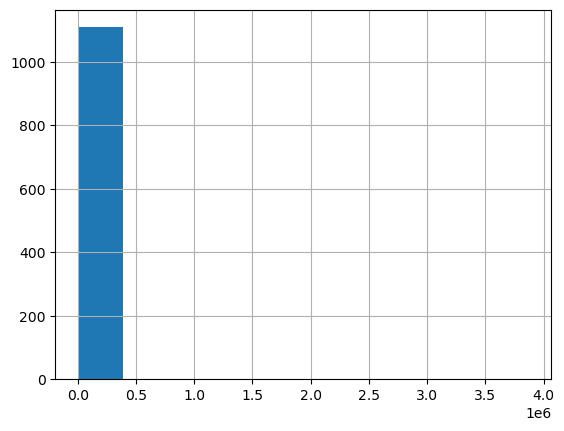

In [7]:
data['Standard Value'].hist(bins=10)

In [8]:
data['Standard Value'].describe()

count    1.114000e+03
mean     3.142795e+04
std      1.305093e+05
min      7.000000e-01
25%      1.600000e+03
50%      1.000000e+04
75%      3.160000e+04
max      3.871000e+06
Name: Standard Value, dtype: float64

<Axes: >

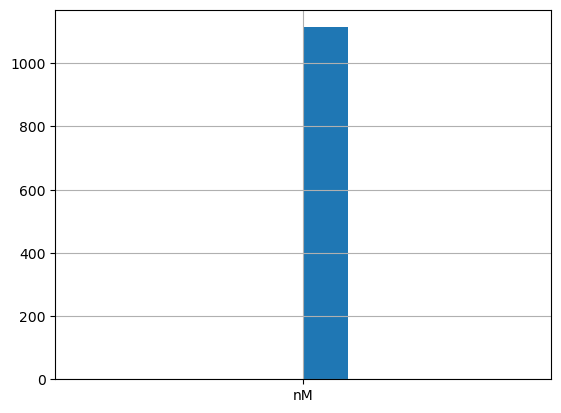

In [9]:
data['Standard Units'].hist()

In [10]:
x = data[data['Standard Value'] > 0]

In [11]:
x.shape

(1114, 46)

In [12]:
y = data[data['Standard Value'] == 0]
y

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type


In [13]:
z = pd.isna(data['Standard Value'])
number = []
for i, element in enumerate(z):
    if element == True:
        number.append([i,element])
    else:
        pass

In [14]:
number[0]

[33, True]

In [15]:
len(number)

73

In [16]:
data.shape

(1187, 46)

In [17]:
x.shape

(1114, 46)

In [18]:
data.shape[0] - x.shape[0]

73

## data traformation

In [19]:
def transform(target_val):
    transformed = []
    for element in target_val:
        transformed.append(-1.0 * np.log10(element/1000000000))
    return transformed

def inverse_transform(transformed_values):
    inversed = []
    for element in transformed_values:
        inversed.append(np.power(10,-element)*1000000000)
    return inversed

In [20]:
x.head()

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type
0,CHEMBL2037345,NaN,NaN,296.33,0.0,3.03,SID17507927,COc1ccc(/C=N/Nc2nc3ccccc3[nH]2)cc1OC,EC50,'=',...,Homo sapiens,SINGLE PROTEIN,CHEMBL1201862,7,PubChem BioAssays,NaN,NaN,NaN,NaN,NaN
1,CHEMBL1576542,NaN,NaN,279.30,0.0,1.39,SID17409056,N#C/C(=C/c1ccccc1)c1nn(CCO)c(N)c1C#N,EC50,'=',...,Homo sapiens,SINGLE PROTEIN,CHEMBL1201862,7,PubChem BioAssays,NaN,NaN,NaN,NaN,NaN
2,CHEMBL1481360,NaN,NaN,310.35,0.0,3.64,SID7967615,CCCCc1cc2c(c(NC(C)=O)n1)c(=O)oc1ccccc12,EC50,'=',...,Homo sapiens,SINGLE PROTEIN,CHEMBL1201862,7,PubChem BioAssays,NaN,NaN,NaN,NaN,NaN
3,CHEMBL1567449,NaN,NaN,243.27,0.0,2.73,SID24804627,COc1ccccc1NC(=O)Nc1cccnc1,EC50,'>',...,Homo sapiens,SINGLE PROTEIN,CHEMBL1201862,7,PubChem BioAssays,NaN,NaN,NaN,NaN,NaN
4,CHEMBL1327628,NaN,NaN,282.13,0.0,4.03,SID24796875,O=C(Nc1cccnc1)Nc1cc(Cl)cc(Cl)c1,EC50,'>',...,Homo sapiens,SINGLE PROTEIN,CHEMBL1201862,7,PubChem BioAssays,NaN,NaN,NaN,NaN,NaN


In [21]:
data_training = x[['Smiles', 'Standard Value', 'Standard Units', 'Comment']]
data_training.head()

,Smiles,Standard Value,Standard Units,Comment
0,COc1ccc(/C=N/Nc2nc3ccccc3[nH]2)cc1OC,67346.0,nM,Not Active
1,N#C/C(=C/c1ccccc1)c1nn(CCO)c(N)c1C#N,82975.0,nM,Not Active
2,CCCCc1cc2c(c(NC(C)=O)n1)c(=O)oc1ccccc12,88714.0,nM,Not Active
3,COc1ccccc1NC(=O)Nc1cccnc1,116108.0,nM,Not Active
4,O=C(Nc1cccnc1)Nc1cc(Cl)cc(Cl)c1,116099.0,nM,Not Active


In [22]:
data_training['Comment'].unique()

array(['Not Active', nan], dtype=object)

C:\Users\aleks\AppData\Local\Temp\ipykernel_14192\809673039.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_training['Comment_bin'] = tmp


<Axes: >

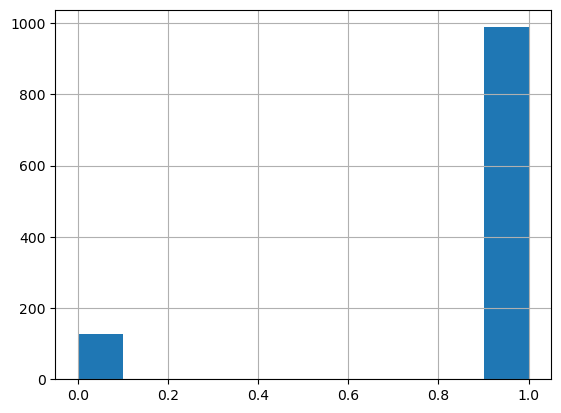

In [23]:
tmp = []
for element in data_training['Comment']:
    if element == 'Not Active':
        tmp.append(0)
    else: # cases without comment
        tmp.append(1)
data_training['Comment_bin'] = tmp
data_training['Comment_bin'].hist()

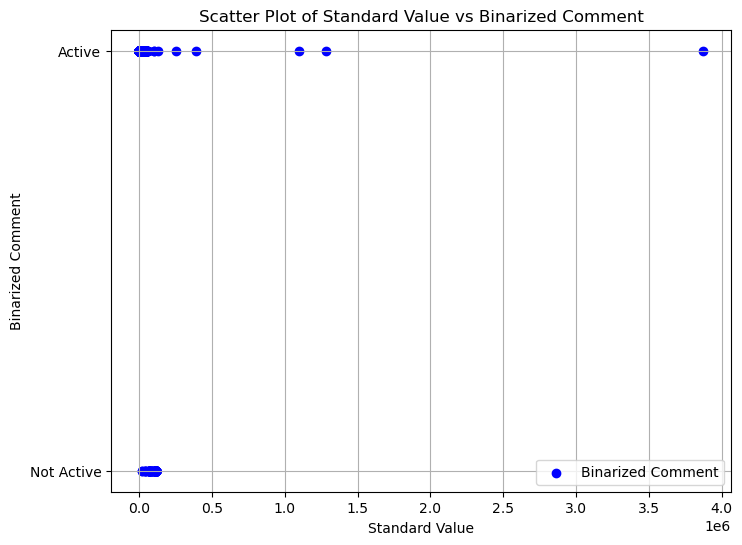

In [24]:
plt.figure(figsize=(8, 6))

# Scatter plot
plt.scatter(data_training['Standard Value'], data_training['Comment_bin'], color='blue', label='Binarized Comment')

plt.xlabel('Standard Value')
plt.ylabel('Binarized Comment')
plt.title('Scatter Plot of Standard Value vs Binarized Comment')

plt.yticks([0, 1], ['Not Active', 'Active'])  # Set y-axis ticks as 0 and 1 for binary values
plt.legend()
plt.grid(True)
plt.show()

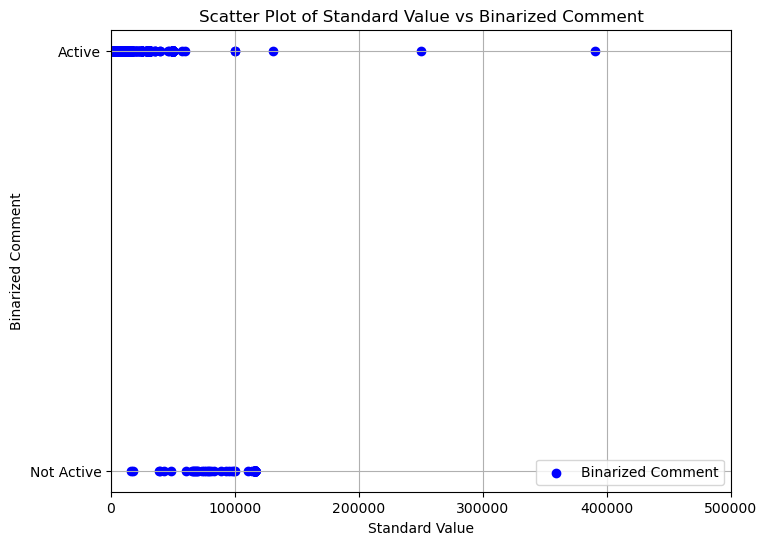

In [25]:
plt.figure(figsize=(8, 6))

# Scatter plot
plt.scatter(data_training['Standard Value'], data_training['Comment_bin'], color='blue', label='Binarized Comment')
plt.xlim([0,500000])
plt.xlabel('Standard Value')
plt.ylabel('Binarized Comment')
plt.title('Scatter Plot of Standard Value vs Binarized Comment')

plt.yticks([0, 1], ['Not Active', 'Active'])  # Set y-axis ticks as 0 and 1 for binary values
plt.legend()
plt.grid(True)
plt.show()

## Activity threshold based on literature: https://doi.org/10.1371/journal.pcbi.1000594

C:\Users\aleks\AppData\Local\Temp\ipykernel_14192\3269438423.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_training['Binarized_activity'] = tmp


<Axes: >

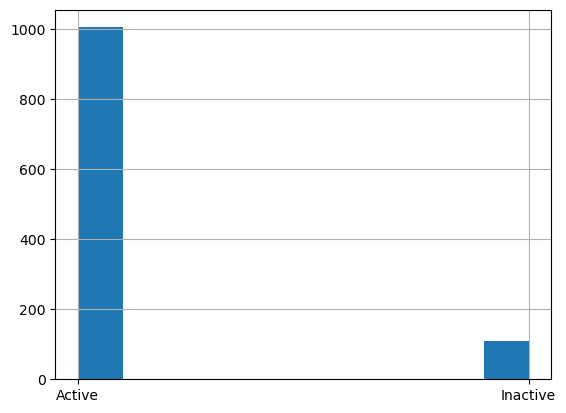

In [26]:
tmp = []
for element in data_training['Standard Value']:
    if element < 100000: #nM (100 uM)
        tmp.append('Active')
    else:
        tmp.append('Inactive')

data_training['Binarized_activity'] = tmp
data_training['Binarized_activity'].hist() # it is not the best solution, as we have overrepresentated active compounds...

C:\Users\aleks\AppData\Local\Temp\ipykernel_14192\3426172298.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_training['Binarized_activity'] = tmp


<Axes: >

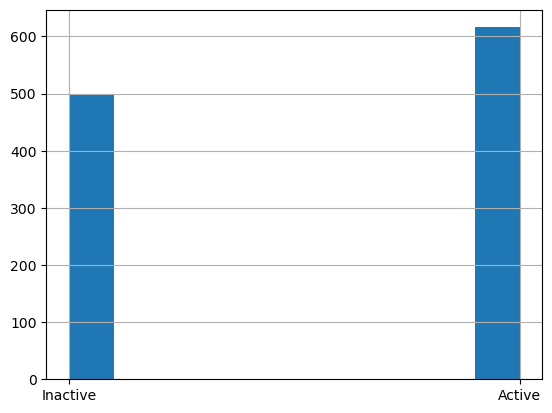

In [27]:
tmp = []
for element in data_training['Standard Value']:
    if element < 12000: #nM (100 uM)
        tmp.append('Active')
    else:
        tmp.append('Inactive')

data_training['Binarized_activity'] = tmp
data_training['Binarized_activity'].hist()

## Other activity threshold sources: 

-> https://doi.org/10.3390%2Fmd17100554, highest -> active 21 uM -> 21000 nM

-> https://doi.org/10.1124/mol.106.033415, highest active -> 2856 nM -> 2.856 uM

-> https://doi.org/10.1124/mol.107.038398, highest active -> agonist mode 4.4 uM -> 4400 nM, antagonist mode 23.9 uM -> 23900 nM

## Regression plot

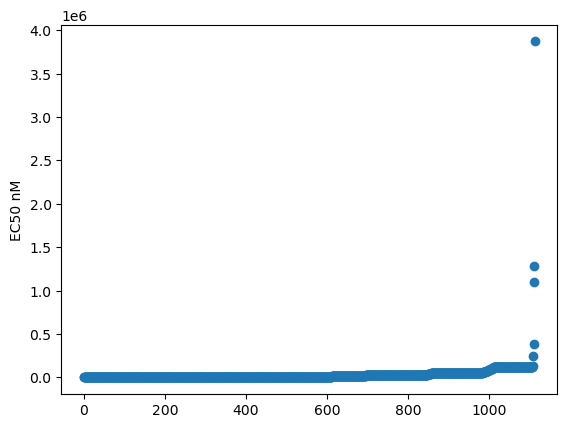

In [28]:
plt.scatter(list(range(0,len(data_training['Standard Value']),1)),data_training['Standard Value'].sort_values())
plt.ylabel('EC50 nM')
plt.show()

In [29]:
data_training['Standard Value'].sort_values().tail()

42      250000.0
567     390000.0
635    1100000.0
6      1282000.0
385    3871000.0
Name: Standard Value, dtype: float64

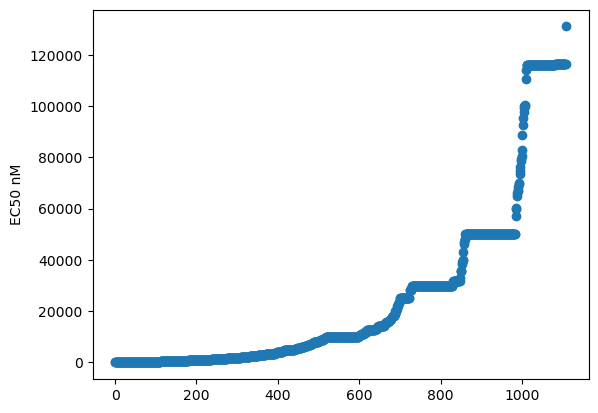

In [30]:
plt.scatter(list(range(0,len(data_training['Standard Value'][0:-5]),1)),data_training['Standard Value'].sort_values()[0:-5])
plt.ylabel('EC50 nM')
plt.show()

In [31]:
q = data_training[data_training['Standard Value'] < 60000]

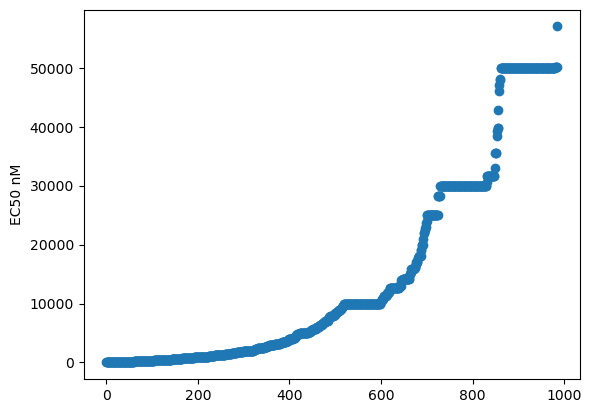

In [32]:
plt.scatter(list(range(0,len(q['Standard Value']),1)),q['Standard Value'].sort_values())
plt.ylabel('EC50 nM')
plt.show()

In [33]:
len(q['Standard Value'])

985

In [34]:
cut = q[q['Standard Value'] < 12000]

In [35]:
len(cut) # active

616

In [36]:
len(q['Standard Value']) - len(cut) #inactive

369

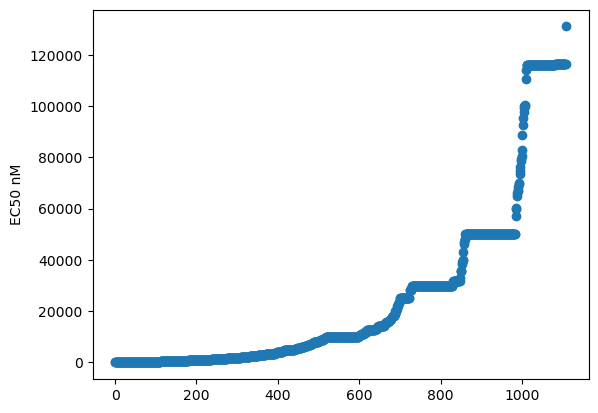

In [37]:
plt.scatter(list(range(0,len(data_training['Standard Value'][0:-5]),1)),data_training['Standard Value'].sort_values()[0:-5])
plt.ylabel('EC50 nM')
plt.show()

In [38]:
w = data_training[data_training['Standard Value'] < 250000]

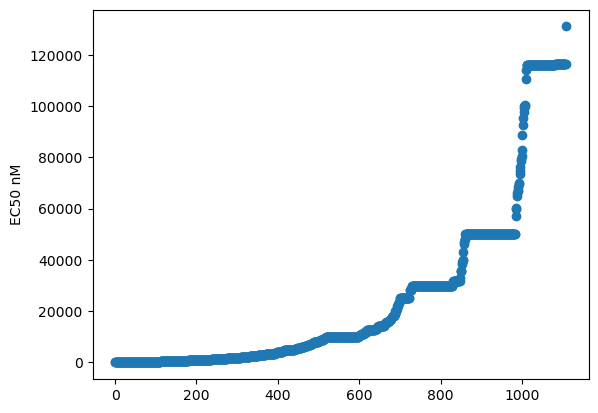

In [39]:
plt.scatter(list(range(0,len(w['Standard Value']),1)),w['Standard Value'].sort_values())
plt.ylabel('EC50 nM')
plt.show()

In [40]:
len(w['Standard Value'])

1109

In [41]:
cut = w[w['Standard Value'] < 12000]

In [42]:
len(cut) # active

616

In [43]:
len(w['Standard Value']) - len(cut) #inactive

493

C:\Users\aleks\AppData\Local\Temp\ipykernel_14192\3661737943.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  w['Binarized_activity'] = tmp


<Axes: >

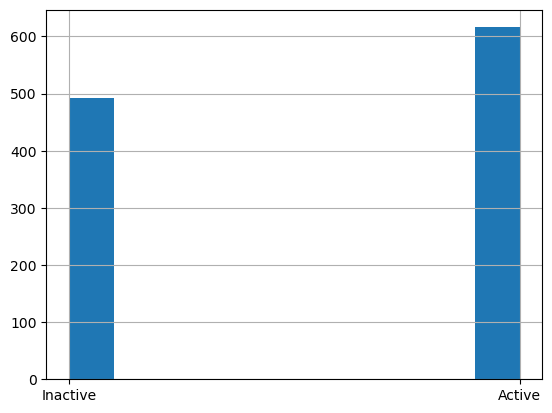

In [44]:
tmp = []
for element in w['Standard Value']:
    if element < 12000: #nM (100 uM)
        tmp.append('Active')
    else:
        tmp.append('Inactive')

w['Binarized_activity'] = tmp
w['Binarized_activity'].hist()

## See if there are duplicates...

In [45]:
data_training.shape

(1114, 6)

In [46]:
data_training.to_excel('see_duplicates.xlsx')

In [47]:
duplicates = data_training.drop_duplicates(subset='Smiles', keep='first')

In [48]:
duplicates.shape

(972, 6)

In [49]:
## aggregation approach -> median values??

In [50]:
# Grouping by 'Smiles' and aggregating 'Value' column into lists
result = data_training.groupby('Smiles')['Standard Value'].apply(list).reset_index()

result.head()

,Smiles,Standard Value
0,Br.CN1CCc2cc(Cl)c(O)cc2[C@H]2c3ccccc3CC[C@@H]21,"[12600.0, 6300.0, 4000.0]"
1,Brc1ccc2ncnc(Nc3ccc(N4CCOCC4)cc3)c2c1,[116132.0]
2,C#CCn1cc(/C=N/NC(=O)COc2cccc3cccnc23)c2ccccc21,[16271.0]
3,C#CCn1cc(/C=N/NC(=O)c2cc3ccccc3o2)c2ccccc21,[116147.0]
4,C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=C/C(=N/O)CC[C@@...,[25100.0]


In [51]:
## keep only entries for which std is lower than 100 nM?

In [52]:
np.std(result['Standard Value'][0])

3635.3205574688395

In [53]:
np.std(result['Standard Value'][1])

0.0

In [54]:
len(result)

972

In [55]:
result['STD_value'] = [np.std(element) for element in result['Standard Value']]
result.head()

,Smiles,Standard Value,STD_value
0,Br.CN1CCc2cc(Cl)c(O)cc2[C@H]2c3ccccc3CC[C@@H]21,"[12600.0, 6300.0, 4000.0]",3635.320557
1,Brc1ccc2ncnc(Nc3ccc(N4CCOCC4)cc3)c2c1,[116132.0],0.000000
2,C#CCn1cc(/C=N/NC(=O)COc2cccc3cccnc23)c2ccccc21,[16271.0],0.000000
3,C#CCn1cc(/C=N/NC(=O)c2cc3ccccc3o2)c2ccccc21,[116147.0],0.000000
4,C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=C/C(=N/O)CC[C@@...,[25100.0],0.000000


<Axes: >

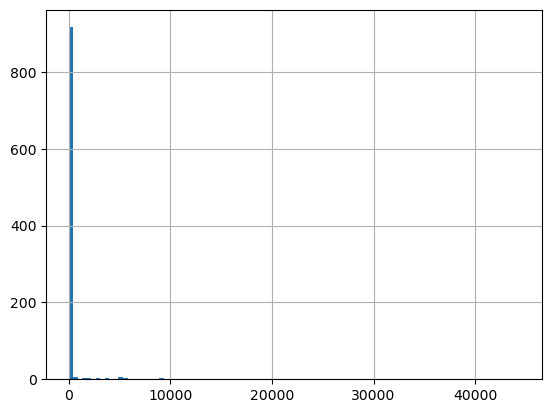

In [56]:
result['STD_value'].hist(bins=100)

In [57]:
training = result[result['STD_value'] < 100]
training.shape

(910, 3)

In [58]:
training_ = result[result['STD_value'] > 100]
training_.shape

(62, 3)

In [59]:
training['target_'] = [np.median(element) for element in training['Standard Value']]
training.head()

C:\Users\aleks\AppData\Local\Temp\ipykernel_14192\2685711714.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training['target_'] = [np.median(element) for element in training['Standard Value']]


,Smiles,Standard Value,STD_value,target_
1,Brc1ccc2ncnc(Nc3ccc(N4CCOCC4)cc3)c2c1,[116132.0],0.0,116132.0
2,C#CCn1cc(/C=N/NC(=O)COc2cccc3cccnc23)c2ccccc21,[16271.0],0.0,16271.0
3,C#CCn1cc(/C=N/NC(=O)c2cc3ccccc3o2)c2ccccc21,[116147.0],0.0,116147.0
4,C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=C/C(=N/O)CC[C@@...,[25100.0],0.0,25100.0
5,C(=N/OCc1ccc(Oc2ccccc2)cc1)\c1c(-c2ccc3ccccc3c...,[1100.0],0.0,1100.0


In [60]:
training = training.reset_index()
training = training.drop(['index'], axis=1)

In [61]:
training.head()

,Smiles,Standard Value,STD_value,target_
0,Brc1ccc2ncnc(Nc3ccc(N4CCOCC4)cc3)c2c1,[116132.0],0.0,116132.0
1,C#CCn1cc(/C=N/NC(=O)COc2cccc3cccnc23)c2ccccc21,[16271.0],0.0,16271.0
2,C#CCn1cc(/C=N/NC(=O)c2cc3ccccc3o2)c2ccccc21,[116147.0],0.0,116147.0
3,C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=C/C(=N/O)CC[C@@...,[25100.0],0.0,25100.0
4,C(=N/OCc1ccc(Oc2ccccc2)cc1)\c1c(-c2ccc3ccccc3c...,[1100.0],0.0,1100.0


In [62]:
training.to_csv('PXR_training_data.csv')

<Axes: >

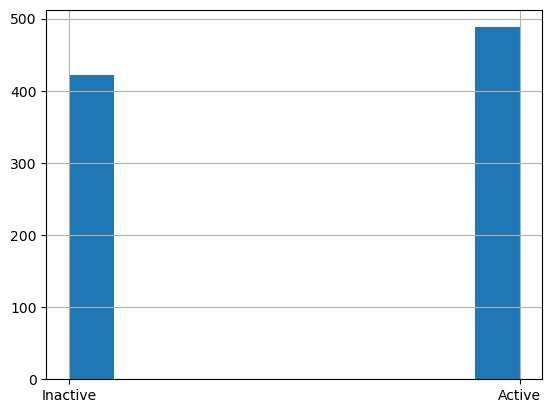

In [63]:
tmp = []
for element in training['target_']:
    if element < 12000: #nM (100 uM)
        tmp.append('Active')
    else:
        tmp.append('Inactive')

training['Binarized_activity'] = tmp
training['Binarized_activity'].hist()

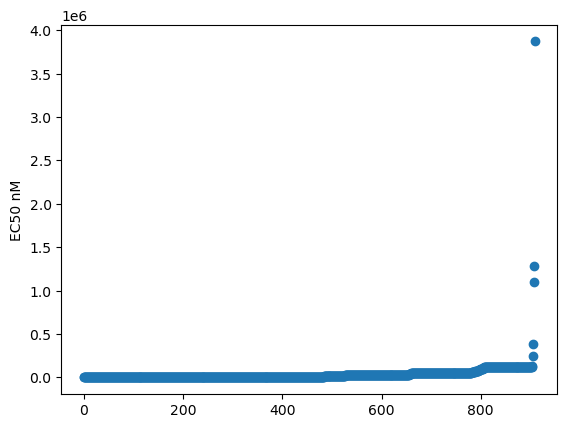

In [65]:
plt.scatter(list(range(0,len(training['target_']),1)),training['target_'].sort_values())
plt.ylabel('EC50 nM')
plt.show()

<Axes: >

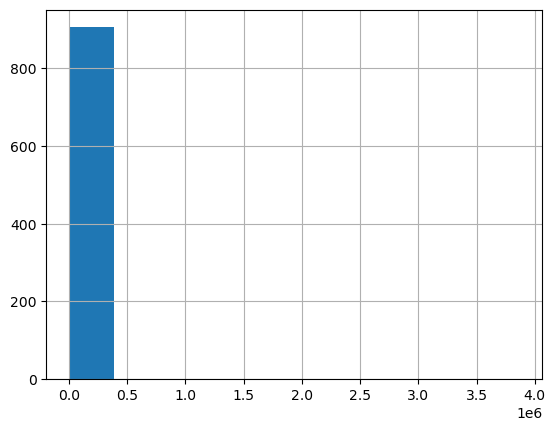

In [67]:
training['target_'].hist()

In [68]:
training['target_transformed'] = transform(training['target_'])

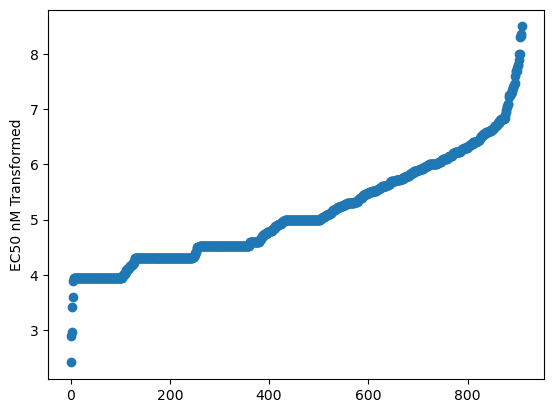

In [69]:
plt.scatter(list(range(0,len(training['target_transformed']),1)),training['target_transformed'].sort_values())
plt.ylabel('EC50 nM Transformed')
plt.show()

<Axes: >

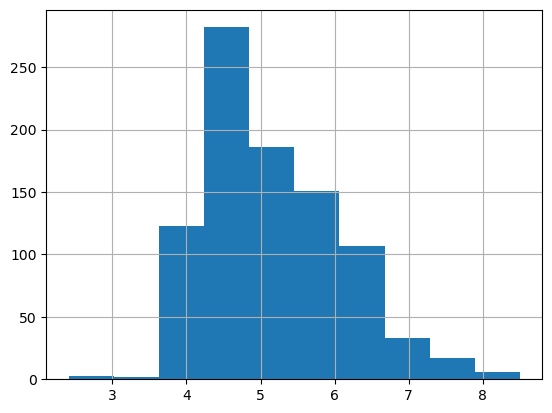

In [70]:
training['target_transformed'].hist()

In [86]:
import numpy
numpy.version.version

'1.23.5'